# HCT Survival Predictions

Goal:  Develop models to improve the prediction of transplant survival rates for patients undergoing allogeneic Hematopoietic Cell Transplantation (HCT) — an important step in ensuring that every patient has a fair chance at a successful outcome, regardless of their background.

Improving survival predictions for allogeneic HCT patients is a vital healthcare challenge. Current predictive models often fall short in addressing disparities related to socioeconomic status, race, and geography. Addressing these gaps is crucial for enhancing patient care, optimizing resource utilization, and rebuilding trust in the healthcare system.

The goal is to address disparities by bridging diverse data sources, refining algorithms, and reducing biases to ensure equitable outcomes for patients across diverse race groups. Your work will help create a more just and effective healthcare environment, ensuring every patient receives the care they deserve.

Dataset Description

The dataset consists of 59 variables related to hematopoietic stem cell transplantation (HSCT), encompassing a range of demographic and medical characteristics of both recipients and donors, such as age, sex, ethnicity, disease status, and treatment details. The primary outcome of interest is event-free survival, represented by the variable efs, while the time to event-free survival is captured by the variable efs_time. These two variables together encode the target for a censored time-to-event analysis. The data, which features equal representation across recipient racial categories including White, Asian, African-American, Native American, Pacific Islander, and More than One Race, was synthetically generated using the data generator from synthcity, trained on a large cohort of real CIBMTR data.


    train.csv - the training set, with target efs (Event-free survival)
    test.csv - the test set; your task is to predict the value of efs for this data
    sample_submission.csv - a sample submission file in the correct format with all predictions set to 0.50
    data_dictionary.csv - a list of all features and targets used in dataset and their descriptions


## Import Package

In [61]:
import numpy as np
import pandas as pd

## Import Dataset

In [62]:
path_data_dictionary = "C:/Users/julia/Desktop/Yanjun/hct competition/data_dictionary.csv"
path_test = "C:/Users/julia/Desktop/Yanjun/hct competition/test.csv"
path_train = "C:/Users/julia/Desktop/Yanjun/hct competition/train.csv"
data_dictionary = pd.read_csv(path_data_dictionary)
path_submission = "C:/Users/julia/Desktop/Yanjun/hct competition/sample_submission.csv"
test = pd.read_csv(path_test)
train = pd.read_csv(path_train)
submission = pd.read_csv(path_submission)

In [63]:
train.dri_score.value_counts()

dri_score
Intermediate                                         10436
N/A - pediatric                                       4779
High                                                  4701
N/A - non-malignant indication                        2427
TBD cytogenetics                                      2003
Low                                                   1926
High - TED AML case <missing cytogenetics             1414
Intermediate - TED AML case <missing cytogenetics      481
N/A - disease not classifiable                         272
Very high                                              198
Missing disease status                                   9
Name: count, dtype: int64

In [64]:
data_dictionary

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [66]:
# remove Id from train
train1 = train.copy()
train1 = train1.drop(columns = 'ID')

In [67]:
train1.efs.value_counts('percent')

# efs = 1 means that this patient has Event after transplant surgery
# efs = 0 means that this patient doesn't has Event after transplant surgery

efs
1.0    0.539306
0.0    0.460694
Name: proportion, dtype: float64

In [68]:
train1.head()

,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [69]:
test

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


## Analyse of the Data

### Check the proposition of missing data

In [70]:
missing = np.round(train1.isna().sum()/len(train), 3) * 100
missing

dri_score                  0.5
psych_disturb              7.2
cyto_score                28.0
diabetes                   7.4
hla_match_c_high          16.0
hla_high_res_8            20.2
tbi_status                 0.0
arrhythmia                 7.6
hla_low_res_6             11.4
graft_type                 0.0
vent_hist                  0.9
renal_issue                6.6
pulm_severe                7.4
prim_disease_hct           0.0
hla_high_res_6            18.3
cmv_status                 2.2
hla_high_res_10           24.9
hla_match_dqb1_high       18.1
tce_imm_match             38.7
hla_nmdp_6                14.6
hla_match_c_low            9.7
rituximab                  7.5
hla_match_drb1_low         9.2
hla_match_dqb1_low        14.6
prod_type                  0.0
cyto_score_detail         41.4
conditioning_intensity    16.6
ethnicity                  2.0
year_hct                   0.0
obesity                    6.1
mrd_hct                   57.6
in_vivo_tcd                0.8
tce_matc

In [71]:
df_missing = pd.DataFrame(missing, columns=['values']).reset_index()

In [72]:
# mark different variables which has different category of missing data percentage:

# function to differentiate different category percentage of missing data
def color_map(percent):
  cmap = []
  for x in percent:
    if x >= 20:
      temp = 'background-color: red'
    elif x >= 5:
      temp = 'background-color: yellow'
    else:
      temp = 'background-color: green'
    cmap.append(temp)
  return cmap
# df_missing.style.map(color_map)
df_missing.style.apply(lambda x: color_map(df_missing['values']), subset= ['index','values'], axis = 0)

,index,values
0,dri_score,0.500000
1,psych_disturb,7.200000
2,cyto_score,28.000000
3,diabetes,7.400000
4,hla_match_c_high,16.000000
5,hla_high_res_8,20.200000
6,tbi_status,0.000000
7,arrhythmia,7.600000
8,hla_low_res_6,11.400000
9,graft_type,0.000000


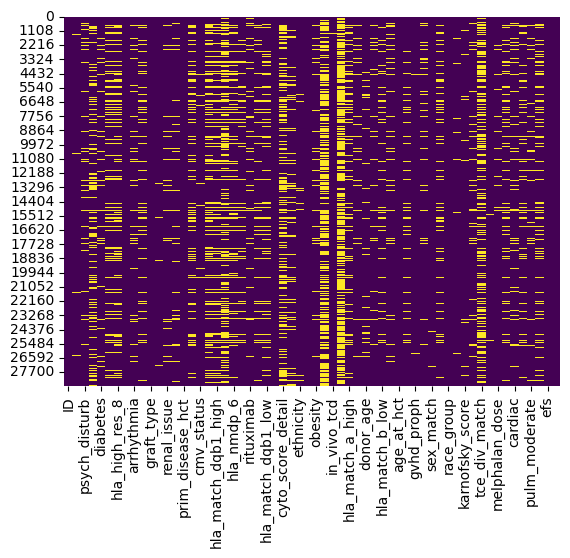

In [73]:
# visualizing the missing data using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train.isnull(), cbar = False, cmap = 'viridis')
plt.show()

### 1.process missing data, 2.use dummy to transfer category variables to numerical variables, 3.deceide which features import to efs and efs_time 

In [74]:
# 1 find variables which has percentage of missing data less than 5%
indexless5 = np.where(missing < 5)
missingless5 = missing.index[indexless5]
print('variables which has percentage of missing data less than 5% :', missingless5)

# 2 find variables which has percentage of missing data 5% - 20%
index5to20 = np.where((missing>= 5) & (missing < 20))
missing5to20 = missing.index[index5to20]
print('variables which has percentage of missing data 5% - 20%: ', missing5to20)

# 3 find variables which has percentage of missing data  more than 20%
index20 = np.where((missing>= 20))
missing20 = missing.index[index20]
print('variables which has percentage of missing data more than 20% :', missing20)


variables which has percentage of missing data less than 5% : Index(['dri_score', 'tbi_status', 'graft_type', 'vent_hist',
       'prim_disease_hct', 'cmv_status', 'prod_type', 'ethnicity', 'year_hct',
       'in_vivo_tcd', 'age_at_hct', 'gvhd_proph', 'sex_match', 'race_group',
       'comorbidity_score', 'karnofsky_score', 'donor_related',
       'melphalan_dose', 'efs', 'efs_time'],
      dtype='object')
variables which has percentage of missing data 5% - 20%:  Index(['psych_disturb', 'diabetes', 'hla_match_c_high', 'arrhythmia',
       'hla_low_res_6', 'renal_issue', 'pulm_severe', 'hla_high_res_6',
       'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab',
       'hla_match_drb1_low', 'hla_match_dqb1_low', 'conditioning_intensity',
       'obesity', 'hla_match_a_high', 'hepatic_severe', 'donor_age',
       'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'hla_match_a_low',
       'rheum_issue', 'hla_match_b_high', 'hepatic_mild', 'hla_low_res_8',
       'cardiac',

In [75]:
# replace missing data in variables which has less than 5 % of missing data with mode or mean 
misssing_less5_object = train1.loc[:, missingless5].select_dtypes(include = 'object').columns
for col in misssing_less5_object:
  train1[col] = train1[col].fillna(train1[col].mode()[0])

misssing_less5_numerical = train1.loc[:, missingless5].select_dtypes(exclude = 'object').columns
for col in misssing_less5_numerical:
  train1[col] = train1[col].fillna(train1[col].mean())

train1[missingless5].isnull().sum()
# check weather there are missing data ln variables which has less than 5 percentage of missing data originally 

dri_score            0
tbi_status           0
graft_type           0
vent_hist            0
prim_disease_hct     0
cmv_status           0
prod_type            0
ethnicity            0
year_hct             0
in_vivo_tcd          0
age_at_hct           0
gvhd_proph           0
sex_match            0
race_group           0
comorbidity_score    0
karnofsky_score      0
donor_related        0
melphalan_dose       0
efs                  0
efs_time             0
dtype: int64

In [76]:
# for variables which has 5% to 20% of missing data, create a missing indicator
for col in missing5to20:
  train1[col +'_missing'] = train1[col].isnull().astype(int)

In [77]:
# Use Cox Proportional Hazards Model to determine whether the missing data has an impact on survival
from lifelines import CoxPHFitter
cph = CoxPHFitter()
# use new data train2 (which is train1 remove missing20)
train2 = train1.copy()
train2 = train2.drop(columns = missing20)


# because Cox Proportional Hazards Model only cope with numerical variables, so change category to numerical(get_dummies)
train2 = pd.get_dummies(train2, drop_first= True, dtype = int)
# remove gvhd_proph_FK+- others(not MMF,MTX) this columns in train2, because this columns all have the same value
train2 = train2.drop(columns = ['gvhd_proph_FK+- others(not MMF,MTX)'])

In [87]:
train2.efs.value_counts()

efs
1.0    15532
0.0    13268
Name: count, dtype: int64

In [89]:
train2 = pd.DataFrame(train2)

In [106]:
import pandas as pd
from lifelines import CoxPHFitter

# Example dataset
data = {
    'duration': [5, 3, 6, 2, 7, 4],
    'event': [1, 1, 0, 1, 0, 1],  # 1 = event occurred, 0 = censored
    'age': [65, 55, 60, 70, 50, 40],
    'gender': ['male', 'female', 'female', 'male', 'male', 'female'],
}

df = pd.DataFrame(data)

# Encoding categorical variables (e.g., gender) using get_dummies
df = pd.get_dummies(df, drop_first=True, dtype = int)

# Instantiate the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the model to the data
# cph.fit(df, duration_col='duration', event_col='event')

# # Print the summary of the fitted Cox model
# cph.print_summary()

In [111]:
df

,duration,event,age,gender_male
0,5,1,65,1
1,3,1,55,0
2,6,0,60,0
3,2,1,70,1
4,7,0,50,1
5,4,1,40,0


In [113]:
import pandas as pd
from lifelines import CoxPHFitter

# Example data
data = {
    'duration': [5, 3, 6, 2, 7, 4],
    'event': [1, 1, 0, 1, 0, 1],  # 1 = event occurred, 0 = censored
    'age': [65, 55, 60, 70, 50, 40],
    'gender': ['male', 'female', 'female', 'male', 'male', 'female'],
}

# Create DataFrame
df = pd.DataFrame(data)

# Check for NaN values in 'duration' and 'event'
print(df[['duration', 'event']].isnull().sum())

# One-hot encode categorical variables like 'gender'
df = pd.get_dummies(df, drop_first=True)

# Check if we are passing a DataFrame
print(type(df))  # Should be <class 'pandas.core.frame.DataFrame'>

# Handle NaN values (if necessary)
df['duration'] = df['duration'].fillna(df['duration'].mean())  # Fill NaNs with the mean
df['event'] = df['event'].fillna(df['event'].mode()[0])  # Fill NaNs with the mode

# Instantiate the Cox Proportional Hazards model
cph = CoxPHFitter()

# Fit the model
cph.fit(df, duration_col='duration', event_col='event')

# Print the summary of the fitted Cox model
cph.print_summary()

duration    0
event       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>


AttributeError: 'Series' object has no attribute 'iteritems'

In [112]:
cph.fit(df, duration_col='duration', event_col='event')

AttributeError: 'Series' object has no attribute 'iteritems'

In [91]:
# fit the model to the train2 
cph.fit(train2['efs', 'efs_time', 'comorbidity_score'], duration_col= 'efs_time', event_col= 'efs')

KeyError: ('efs', 'efs_time', 'comorbidity_score')

### Use random forests, XGBoost, or LightGBM to handle missing data, or Cox Proporttional Hazzrds model 